In [24]:
%matplotlib inline

import pandas as pd
from os import path
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import datetime

FONT_SIZE = 28
matplotlib.rc('font', size=FONT_SIZE)
matplotlib.rc('axes', titlesize=FONT_SIZE)

In [3]:
moscow_map_img = plt.imread(path.join('/home/ilya', 'moscow_map.png'))
moscow_map_img_bounds = [36.862284, 38.458054, 55.330742, 56.138823]

df_OrdersDrivers = pd.read_csv(path.join('/mnt/data/raw', 'orders_drivers.csv'))
print(df_OrdersDrivers.head(10))

df_OrdersRiders = pd.read_csv(path.join('/mnt/data/raw', 'orders_riders.csv'))
df_OrdersRiders['order_datetime'] = df_OrdersRiders['order_datetime'].apply(
    lambda d_str: datetime.datetime.strptime(d_str, '%Y-%m-%d %H:%M:%S.%f'))
df_OrdersRiders.head(10)


   order_gk              order_datetime  driver_gk order_status class_type  \
0    173965  2017-09-25 18:36:01.000000       1137    Completed   Standard   
1    782457  2017-09-15 09:14:38.000000       1137    Completed    Economy   
2    647029  2017-09-25 16:15:15.000000       1137    Completed   Standard   
3    112120  2017-09-19 10:42:28.000000       1137    Completed   Standard   
4    835533  2017-09-27 21:43:28.000000       1137    Completed   Standard   
5   1157552  2017-09-20 17:18:51.000000       1137    Completed   Standard   
6   1140260  2017-09-15 08:25:39.000000       1137    Completed   Standard   
7   1205664  2017-09-04 09:43:12.000000       1137    Completed   Standard   
8      3126  2017-09-03 09:07:08.000000       1137    Completed   Standard   
9   1207025  2017-09-14 17:24:05.000000       1137    Completed       Kids   

   rider_total_cost  paid_with_prepaid payment_type ride_type  \
0            586.00                NaN      Voucher  business   
1          

,order_gk,order_datetime,rider_gk,order_status,class_type,rider_total_cost,paid_with_prepaid,payment_type,ride_type,m_ride_duration,ride_distance_key,m_driver_wait_time,m_rating,rider_ftp_date_key,rider_main_device_desc,driver_ftp_date_key,driver_device_platform,total_loyalty_points,acquisition_channel_desc
0,376885,2017-09-21 21:30:53,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,NaN,NaN,NaN,2017-07-01,Android,2017-04-18,Android,1285,NaN
1,11150,2017-09-27 09:49:42,9444,Completed,Standard,856.0,NaN,Voucher,business,3179.0,28.3,150.0,NaN,2017-07-01,Android,2017-06-15,iOS,1285,NaN
2,251087,2017-09-21 21:32:04,9444,Completed,Standard,601.0,NaN,Voucher,business,1868.0,13.9,513.0,NaN,2017-07-01,Android,2017-06-16,Android,1285,NaN
3,311599,2017-09-25 13:38:47,9444,Completed,Standard,533.0,NaN,Voucher,business,1982.0,20.5,179.0,NaN,2017-07-01,Android,2015-12-28,Android,1285,NaN
4,165521,2017-09-25 11:01:17,9444,Completed,Standard,686.0,NaN,Voucher,business,2552.0,15.8,97.0,5.0,2017-07-01,Android,2016-04-28,iOS,1285,NaN
5,364834,2017-09-18 17:31:53,9444,Completed,Standard,465.0,NaN,Voucher,business,1587.0,12.0,9.0,NaN,2017-07-01,Android,2017-07-31,Android,1285,NaN
6,618365,2017-09-15 16:26:40,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,NaN,NaN,NaN,2017-07-01,Android,1900-01-01,Unknown,1285,NaN
7,395680,2017-09-15 16:15:46,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,NaN,NaN,NaN,2017-07-01,Android,1900-01-01,Unknown,1285,NaN
8,385430,2017-09-21 17:00:33,9444,Completed,Standard,737.0,NaN,Voucher,business,2573.0,15.1,657.0,NaN,2017-07-01,Android,2013-09-04,Android,1285,NaN
9,63417,2017-09-15 16:21:54,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,NaN,NaN,NaN,2017-07-01,Android,1900-01-01,Unknown,1285,NaN


In [4]:
# orders_riders['order_datetime'] = pd.to_datetime(orders_riders['order_datetime'], format = '%Y-%m-%d %H:%M:%S')
# orders_riders['rider_ftp_date_key'] = pd.to_datetime(orders_riders['rider_ftp_date_key'], format = '%Y-%m-%d')
df_OrdersRiders['weekday_key'] = df_OrdersRiders['order_datetime'].apply(lambda d: int(d.strftime('%w')))
df_OrdersRiders['hour_key'] = df_OrdersRiders['order_datetime'].apply(lambda d: d.hour)
df_OrdersRiders.head(10)

,order_gk,order_datetime,rider_gk,order_status,class_type,rider_total_cost,paid_with_prepaid,payment_type,ride_type,m_ride_duration,...,m_driver_wait_time,m_rating,rider_ftp_date_key,rider_main_device_desc,driver_ftp_date_key,driver_device_platform,total_loyalty_points,acquisition_channel_desc,weekday_key,hour_key
0,376885,2017-09-21 21:30:53,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,...,NaN,NaN,2017-07-01,Android,2017-04-18,Android,1285,NaN,4,21
1,11150,2017-09-27 09:49:42,9444,Completed,Standard,856.0,NaN,Voucher,business,3179.0,...,150.0,NaN,2017-07-01,Android,2017-06-15,iOS,1285,NaN,3,9
2,251087,2017-09-21 21:32:04,9444,Completed,Standard,601.0,NaN,Voucher,business,1868.0,...,513.0,NaN,2017-07-01,Android,2017-06-16,Android,1285,NaN,4,21
3,311599,2017-09-25 13:38:47,9444,Completed,Standard,533.0,NaN,Voucher,business,1982.0,...,179.0,NaN,2017-07-01,Android,2015-12-28,Android,1285,NaN,1,13
4,165521,2017-09-25 11:01:17,9444,Completed,Standard,686.0,NaN,Voucher,business,2552.0,...,97.0,5.0,2017-07-01,Android,2016-04-28,iOS,1285,NaN,1,11
5,364834,2017-09-18 17:31:53,9444,Completed,Standard,465.0,NaN,Voucher,business,1587.0,...,9.0,NaN,2017-07-01,Android,2017-07-31,Android,1285,NaN,1,17
6,618365,2017-09-15 16:26:40,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,...,NaN,NaN,2017-07-01,Android,1900-01-01,Unknown,1285,NaN,5,16
7,395680,2017-09-15 16:15:46,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,...,NaN,NaN,2017-07-01,Android,1900-01-01,Unknown,1285,NaN,5,16
8,385430,2017-09-21 17:00:33,9444,Completed,Standard,737.0,NaN,Voucher,business,2573.0,...,657.0,NaN,2017-07-01,Android,2013-09-04,Android,1285,NaN,4,17
9,63417,2017-09-15 16:21:54,9444,Cancelled,Standard,NaN,NaN,Voucher,business,NaN,...,NaN,NaN,2017-07-01,Android,1900-01-01,Unknown,1285,NaN,5,16


In [5]:
df_OrdersRiders_ByStatus = df_OrdersRiders.groupby('order_status')['order_status'].count().to_frame()
df_OrdersRiders_ByStatus['total'] = len(df_OrdersRiders)
df_OrdersRiders_ByStatus['rate'] = 100. * df_OrdersRiders_ByStatus['order_status'] / df_OrdersRiders_ByStatus['total']
df_OrdersRiders_ByStatus['rate'].to_frame()

,rate
order_status,
Cancelled,21.332618
Completed,65.214020
Rejected,13.453361


In [6]:
df_OrdersRiders_Specific = df_OrdersRiders[df_OrdersRiders['rider_gk'] == 1436]
df_OrdersRiders_Specific.sort_values('order_datetime')

,order_gk,order_datetime,rider_gk,order_status,class_type,rider_total_cost,paid_with_prepaid,payment_type,ride_type,m_ride_duration,...,m_driver_wait_time,m_rating,rider_ftp_date_key,rider_main_device_desc,driver_ftp_date_key,driver_device_platform,total_loyalty_points,acquisition_channel_desc,weekday_key,hour_key
652467,97720,2017-09-18 12:19:22,1436,Cancelled,Economy,NaN,NaN,Cash,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,1,12
652455,450661,2017-09-19 08:36:35,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652458,585476,2017-09-19 08:38:57,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652463,505773,2017-09-19 08:41:27,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652462,57333,2017-09-19 08:43:46,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652460,436391,2017-09-19 08:49:25,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652456,586394,2017-09-19 08:51:53,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652459,388879,2017-09-19 08:54:24,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652452,538953,2017-09-19 08:57:55,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,8
652464,179065,2017-09-19 09:02:31,1436,Rejected,Economy,NaN,NaN,Credit_card,private,NaN,...,NaN,NaN,2017-09-19,iPhone,1900-01-01,Unknown,175,MOBILE,2,9


In [7]:
df_OrdersRiders[df_OrdersRiders['order_status'] == 'Rejected']

,order_gk,order_datetime,rider_gk,order_status,class_type,rider_total_cost,paid_with_prepaid,payment_type,ride_type,m_ride_duration,...,m_driver_wait_time,m_rating,rider_ftp_date_key,rider_main_device_desc,driver_ftp_date_key,driver_device_platform,total_loyalty_points,acquisition_channel_desc,weekday_key,hour_key
32,68349,2017-09-24 00:50:03,28924,Rejected,Standard,NaN,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,0,0
33,410779,2017-09-27 11:33:40,28924,Rejected,Standard,NaN,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,3,11
34,624127,2017-09-09 14:32:44,28924,Rejected,Premium,0.0,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,6,14
35,188508,2017-09-21 21:18:24,28924,Rejected,Standard,NaN,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,4,21
36,559780,2017-09-11 16:02:15,28924,Rejected,Standard,0.0,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,1,16
37,563302,2017-09-09 20:49:44,28924,Rejected,Standard,0.0,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,6,20
38,140806,2017-09-11 00:28:22,28924,Rejected,Economy,0.0,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,1,0
39,445835,2017-09-11 00:28:10,28924,Rejected,Standard,0.0,NaN,Cash,private,NaN,...,NaN,NaN,1900-01-01,Android,1900-01-01,Unknown,5,MOBILE,1,0
78,122142,2017-09-28 15:17:28,14148,Rejected,Standard,0.0,NaN,Cash,business,NaN,...,NaN,NaN,2017-04-18,Unknown,1900-01-01,Unknown,8780,MOBILE,4,15
79,380046,2017-09-25 23:12:08,14148,Rejected,Standard,NaN,NaN,Cash,business,NaN,...,NaN,NaN,2017-04-18,Unknown,1900-01-01,Unknown,8780,MOBILE,1,23


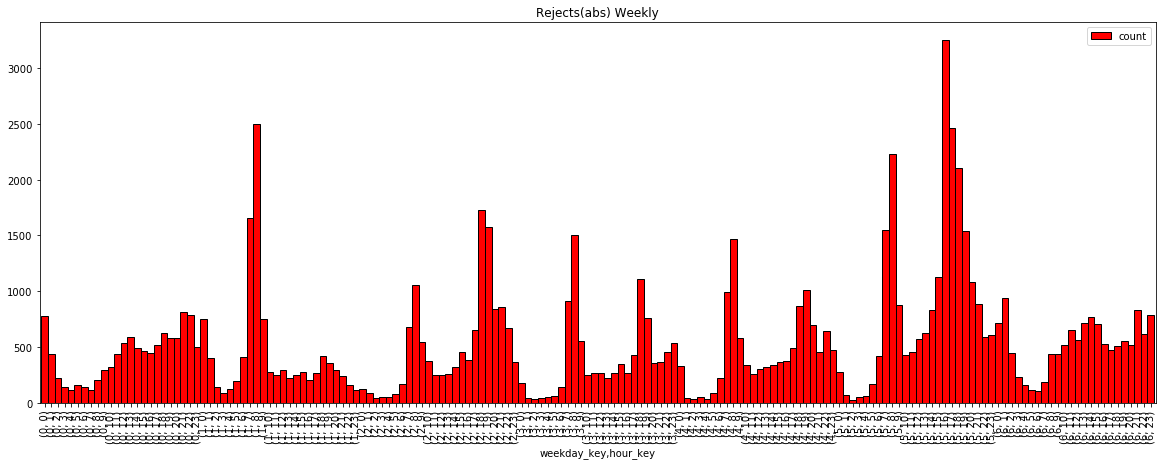

In [8]:
df_OrdersRiders_Reject = df_OrdersRiders[df_OrdersRiders['order_status'] == 'Rejected']
df_OrdersRiders_RejectByDayHour = df_OrdersRiders_Reject.groupby(['weekday_key', 'hour_key']).size()
df_OrdersRiders_RejectByDayHour = df_OrdersRiders_RejectByDayHour.reset_index()
df_OrdersRiders_RejectByDayHour.rename(columns={0: 'count'}, inplace=True)
# df_OrdersRiders_RejectByDayHour.head(10)

df_UniqueTimeKeys = pd.merge(
    pd.DataFrame({'tmp_key': 0, 'weekday_key': range(0,7)}),
    pd.DataFrame({'tmp_key': 0, 'hour_key': range(0,24)}), on='tmp_key')[['weekday_key', 'hour_key']]
# df_UniqueTimeKeys.head(10)

df_OrdersRiders_RejectByDayHour = pd.merge(df_UniqueTimeKeys, df_OrdersRiders_RejectByDayHour,
                                            on=['weekday_key', 'hour_key'], how='left')
df_OrdersRiders_RejectByDayHour.fillna(0., inplace=True)
df_OrdersRiders_RejectByDayHour.set_index(['weekday_key', 'hour_key'], inplace=True)
# df_OrdersRiders_RejectByDayHour.head(10)

fig, ax = plt.subplots(figsize=(20,7))
df_OrdersRiders_RejectByDayHour.plot(kind='bar', title='Rejects(abs) Weekly', ax=ax, color='r', width=1, edgecolor='k', linewidth=1)

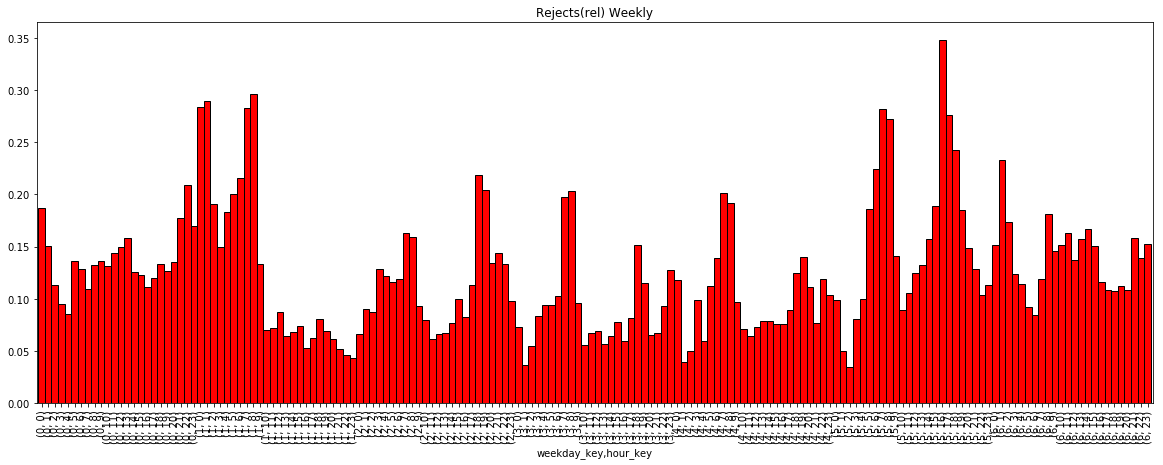

In [9]:
df_OrdersRiders_Reject = df_OrdersRiders[df_OrdersRiders['order_status'] == 'Rejected']
df_OrdersRiders_RejectByDayHour = df_OrdersRiders_Reject.groupby(['weekday_key', 'hour_key']).size()
df_OrdersRiders_RejectByDayHour = df_OrdersRiders_RejectByDayHour.reset_index()
df_OrdersRiders_RejectByDayHour.rename(columns={0: 'count_rejects'}, inplace=True)

df_OrdersRiders_ByDayHour = df_OrdersRiders.groupby(['weekday_key', 'hour_key']).size()
df_OrdersRiders_ByDayHour = df_OrdersRiders_ByDayHour.reset_index()
df_OrdersRiders_ByDayHour.rename(columns={0: 'count_total'}, inplace=True)

df_UniqueTimeKeys = pd.merge(
    pd.DataFrame({'tmp_key': 0, 'weekday_key': range(0,7)}),
    pd.DataFrame({'tmp_key': 0, 'hour_key': range(0,24)}), on='tmp_key')[['weekday_key', 'hour_key']]

df_OrdersRiders_ByDayHour_Full = pd.merge(pd.merge(
    df_UniqueTimeKeys,
    df_OrdersRiders_ByDayHour, on=['weekday_key', 'hour_key'], how='left'),
    df_OrdersRiders_RejectByDayHour, on=['weekday_key', 'hour_key'], how='left')
df_OrdersRiders_ByDayHour_Full.fillna(0., inplace=True)
df_OrdersRiders_ByDayHour_Full.set_index(['weekday_key', 'hour_key'], inplace=True)

df_OrdersRiders_ByDayHour_Full['rejects_rate'] = df_OrdersRiders_ByDayHour_Full['count_rejects'] / df_OrdersRiders_ByDayHour_Full['count_total']
df_OrdersRiders_ByDayHour_Full.head(10)

fig, ax = plt.subplots(figsize=(20,7))
df_OrdersRiders_ByDayHour_Full['rejects_rate'].plot(kind='bar', title='Rejects(rel) Weekly', ax=ax, color='r', width=1, edgecolor='k', linewidth=1)

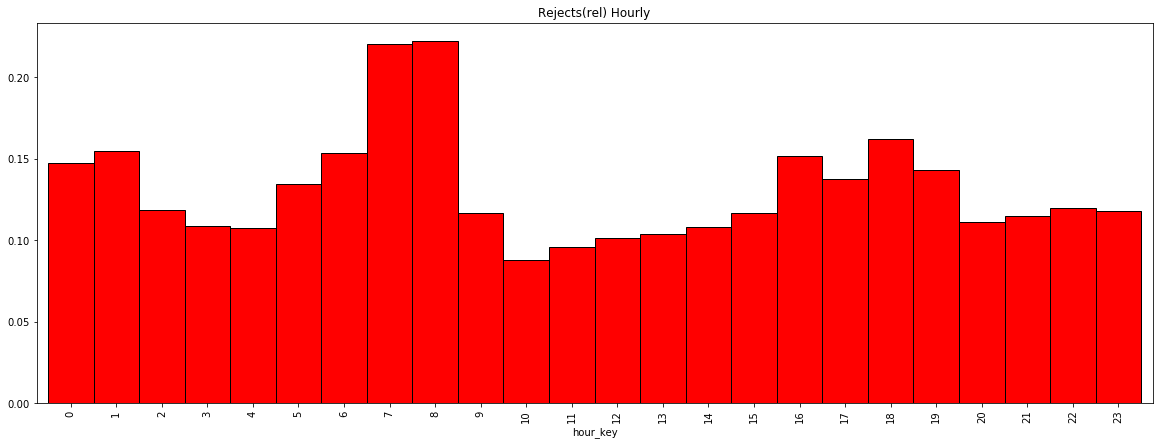

In [10]:
df_OrdersRiders_Reject = df_OrdersRiders[df_OrdersRiders['order_status'] == 'Rejected']
df_OrdersRiders_RejectByHour = df_OrdersRiders_Reject.groupby(['hour_key']).size()
df_OrdersRiders_RejectByHour = df_OrdersRiders_RejectByHour.reset_index()
df_OrdersRiders_RejectByHour.rename(columns={0: 'count_rejects'}, inplace=True)

df_OrdersRiders_ByHour = df_OrdersRiders.groupby(['hour_key']).size()
df_OrdersRiders_ByHour = df_OrdersRiders_ByHour.reset_index()
df_OrdersRiders_ByHour.rename(columns={0: 'count_total'}, inplace=True)

df_UniqueTimeKeys = pd.DataFrame({'tmp_key': 0, 'hour_key': range(0,24)})

df_OrdersRiders_ByHour_Full = pd.merge(pd.merge(
    df_UniqueTimeKeys,
    df_OrdersRiders_RejectByHour, on=['hour_key'], how='left'),
    df_OrdersRiders_ByHour, on=['hour_key'], how='left')
df_OrdersRiders_ByHour_Full.fillna(0., inplace=True)
df_OrdersRiders_ByHour_Full.set_index(['hour_key'], inplace=True)

df_OrdersRiders_ByHour_Full['rejects_rate'] = df_OrdersRiders_ByHour_Full['count_rejects'] / df_OrdersRiders_ByHour_Full['count_total']
df_OrdersRiders_ByHour_Full.head(10)

fig, ax = plt.subplots(figsize=(20,7))
df_OrdersRiders_ByHour_Full['rejects_rate'].plot(kind='bar', title='Rejects(rel) Hourly', ax=ax, color='r', width=1, edgecolor='k', linewidth=1)

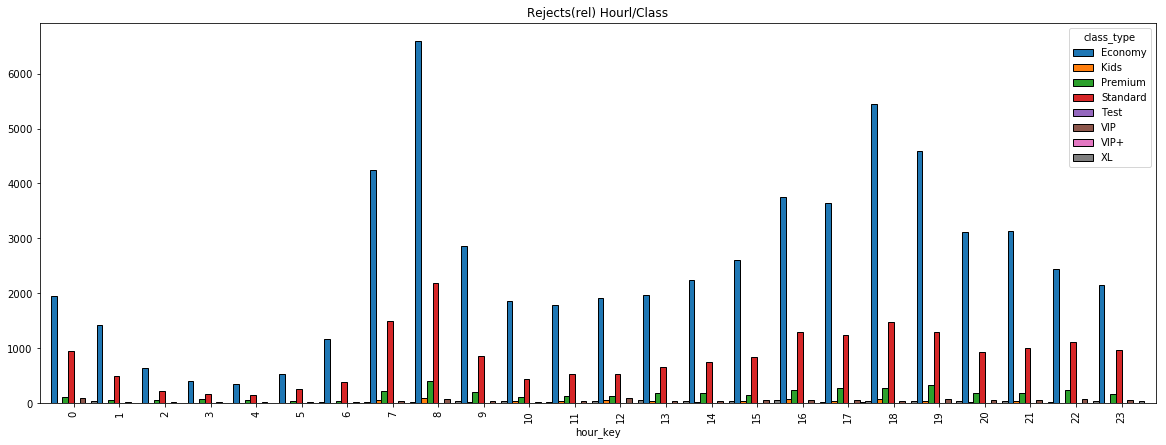

In [11]:
df_OrdersRiders_Reject = df_OrdersRiders[df_OrdersRiders['order_status'] == 'Rejected']
df_OrdersRiders_RejectByHourClass = df_OrdersRiders_Reject.groupby(['hour_key', 'class_type']).size()
df_OrdersRiders_RejectByHourClass = df_OrdersRiders_RejectByHourClass.reset_index()
df_OrdersRiders_RejectByHourClass.rename(columns={0: 'count_rejects'}, inplace=True)

df_OrdersRiders_ByHourClass = df_OrdersRiders.groupby(['hour_key', 'class_type']).size()
df_OrdersRiders_ByHourClass = df_OrdersRiders_ByHourClass.reset_index()
df_OrdersRiders_ByHourClass.rename(columns={0: 'count_total'}, inplace=True)

s_AllClasses = df_OrdersRiders['class_type'].unique()
df_UniqueTimeClassKeys = pd.merge(
    pd.DataFrame({'tmp_key': 0, 'class_type': s_AllClasses}),
    pd.DataFrame({'tmp_key': 0, 'hour_key': range(0,24)}), on='tmp_key')[['class_type', 'hour_key']]

df_OrdersRiders_ByHourClass_Full = pd.merge(pd.merge(
    df_UniqueTimeClassKeys,
    df_OrdersRiders_RejectByHourClass, on=['hour_key', 'class_type'], how='left'),
    df_OrdersRiders_ByHourClass, on=['hour_key', 'class_type'], how='left')
df_OrdersRiders_ByHourClass_Full.fillna(0., inplace=True)
df_OrdersRiders_ByHourClass_Full.set_index(['hour_key', 'class_type'], inplace=True)
# df_OrdersRiders_ByHourClass_Full.head(10)

df_OrdersRiders_ByHourClass_Full['rejects_rate'] = df_OrdersRiders_ByHourClass_Full['count_rejects'] / df_OrdersRiders_ByHourClass_Full['count_total']
df_OrdersRiders_ByHourClass_Full.head(10)

df_OrdersRiders_ByHourClass_RRate = df_OrdersRiders_ByHourClass_Full['rejects_rate']
df_OrdersRiders_ByHourClass_RRate = df_OrdersRiders_ByHourClass_RRate.reset_index()
df_OrdersRiders_ByHourClass_RRate = df_OrdersRiders_ByHourClass_RRate.pivot_table(index=['hour_key'], columns='class_type', values='rejects_rate')
df_OrdersRiders_ByHourClass_RRate.head(10)

df_OrdersRiders_ByHourClass_R = df_OrdersRiders_ByHourClass_Full['count_rejects']
df_OrdersRiders_ByHourClass_R = df_OrdersRiders_ByHourClass_R.reset_index()
df_OrdersRiders_ByHourClass_R = df_OrdersRiders_ByHourClass_R.pivot_table(index=['hour_key'], columns='class_type', values='count_rejects')
df_OrdersRiders_ByHourClass_R.head(10)


fig, ax = plt.subplots(figsize=(20,7))
df_OrdersRiders_ByHourClass_R.plot(kind='bar', title='Rejects(rel) Hourl/Class', ax=ax, width=1, edgecolor='k', linewidth=1)

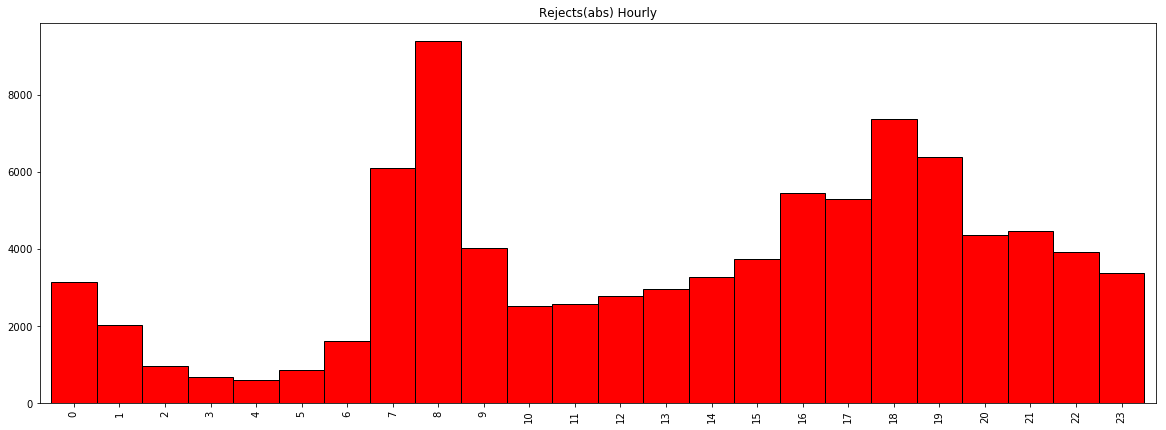

In [12]:
df_OrdersRiders_Reject = df_OrdersRiders[df_OrdersRiders['order_status'] == 'Rejected']
df_OrdersRiders_RejectByHour = df_OrdersRiders_Reject.groupby(['hour_key']).size()
df_OrdersRiders_RejectByHour = df_OrdersRiders_RejectByHour.reset_index()
df_OrdersRiders_RejectByHour.rename(columns={0: 'count_rejects'}, inplace=True)

fig, ax = plt.subplots(figsize=(20,7))
df_OrdersRiders_RejectByHour['count_rejects'].plot(kind='bar', title='Rejects(abs) Hourly', ax=ax, color='r', width=1, edgecolor='k', linewidth=1)

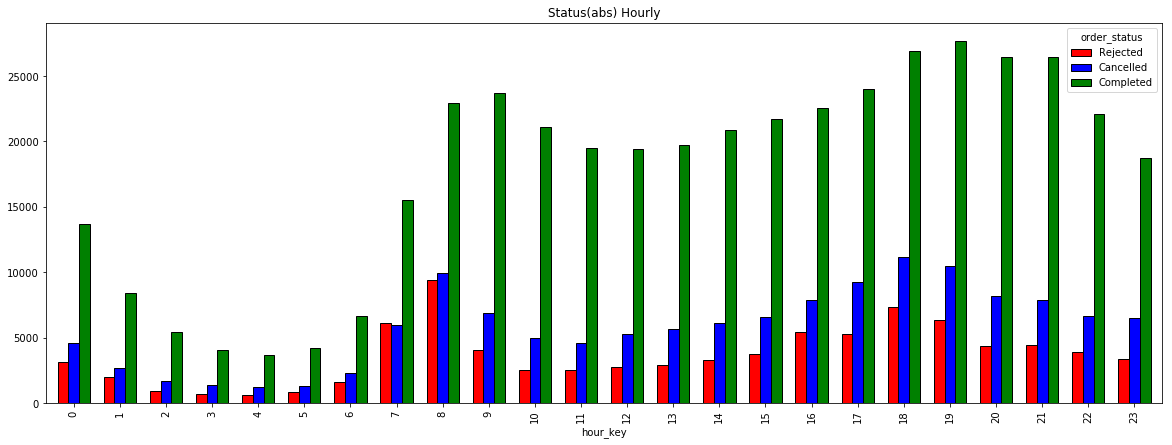

In [13]:
df_OrdersRiders_ByHourStatus = df_OrdersRiders.groupby(['order_status', 'hour_key']).size()
df_OrdersRiders_ByHourStatus = df_OrdersRiders_ByHourStatus.reset_index()
df_OrdersRiders_ByHourStatus.rename(columns={0: 'count'}, inplace=True)

df_OrdersRiders_ByHourStatus = df_OrdersRiders_ByHourStatus.pivot_table(index=['hour_key'],
                                                                        columns='order_status', values='count')
df_OrdersRiders_ByHourStatus = df_OrdersRiders_ByHourStatus[['Rejected', 'Cancelled', 'Completed']]
df_OrdersRiders_ByHourStatus.head(10)

fig, ax = plt.subplots(figsize=(20,7))
df_OrdersRiders_ByHourStatus.plot(kind='bar', title='Status(abs) Hourly', ax=ax, color=['r' ,'b', 'g'], width=0.7, edgecolor='k', linewidth=1)

In [14]:
df_OrdersRiders_GoodCost = df_OrdersRiders[df_OrdersRiders['rider_total_cost'].notnull() & (df_OrdersRiders['rider_total_cost'] != 0.)]
df_OrdersRiders_GoodCost_ByHour = df_OrdersRiders_GoodCost.groupby(['hour_key'])['rider_total_cost'].aggregate([np.average, np.std, np.min, np.max])
df_OrdersRiders_GoodCost_ByHour


# fig, ax = plt.subplots(figsize=(20,7))
# df_OrdersRiders_GoodCost_ByHour.plot(kind='bar', title='Cost(avg) Hourly', ax=ax, color=['r'], width=0.7, edgecolor='k', linewidth=1)

,average,std,amin,amax
hour_key,,,,
0,572.298735,524.132148,0.85,22587.29
1,579.486198,596.225988,0.85,27969.50
2,599.931425,495.608429,0.85,9575.42
3,656.394622,553.875014,0.85,9787.98
4,730.761899,574.575548,0.85,6414.41
5,758.397566,624.630377,0.85,12514.41
6,729.712914,607.798327,0.85,20931.35
7,621.120530,1168.562303,0.85,67732.96
8,539.370174,499.595075,0.85,25016.10


In [15]:
a=np.array([1,2])
np.std(a)

0.5

# Count tricky rejects

In [16]:
df_OrdersRiders_Cancels = df_OrdersRiders[df_OrdersRiders['order_status'] == 'Cancelled']
df_OrdersRiders_Cancels['with_driver'] = df_OrdersRiders_Cancels['driver_ftp_date_key'].apply(lambda d: d != '1900-01-01')
df_OrdersRiders_Cancels.head(10)

df_OrdersRiders_Cancels_ByDriver = df_OrdersRiders_Cancels.groupby('with_driver')['with_driver'].count().to_frame()
df_OrdersRiders_Cancels_ByDriver['Total'] = len(df_OrdersRiders)
df_OrdersRiders_Cancels_ByDriver['rate'] = 100. *  df_OrdersRiders_Cancels_ByDriver['with_driver']/df_OrdersRiders_Cancels_ByDriver['Total']
df_OrdersRiders_Cancels_ByDriver['rate'].to_frame()

/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,rate
with_driver,
False,8.902662
True,12.429956


In [17]:
trip_gk_gen=0
TRIP_THRESHOLD = datetime.timedelta(minutes=25)

def split_rider_trips(rider_rows):
    global trip_gk_gen

    trip_statuses = {}
    trip_gk_column = []
    last_status = None
    last_timestamp = None
    for index, row in rider_rows.iterrows():
        if ((last_timestamp is None) or (row['order_datetime'] - last_timestamp >= TRIP_THRESHOLD) 
                or (last_status == 'Completed')):
            if last_status is not None:
                trip_statuses[trip_gk_gen] = last_status
            trip_gk_gen += 1
        trip_gk_column.append(trip_gk_gen)
        last_status = row['order_status']
        last_timestamp = row['order_datetime']
    if last_status is not None:
        trip_statuses[trip_gk_gen] = last_status
    trip_statuses_column = [trip_statuses[trip_gk] for trip_gk in trip_gk_column]
    return trip_gk_column, trip_statuses_column
    
def split_dataframe_trips(df):
    df.sort_values(['rider_gk', 'order_datetime'], inplace=True)
    riders = df['rider_gk'].unique()
    df_groupped = df.groupby(['rider_gk'])
    trip_gk_all, trip_stats_all = [], []
    for rider_gk in riders:
        trip_gk, trip_stats = split_rider_trips(df_groupped.get_group(rider_gk))
        trip_gk_all += trip_gk
        trip_stats_all += trip_stats
    df.insert(loc=0, column='trip_gk', value=pd.Series(trip_gk_all).values)
    df.insert(loc=1, column='trip_status', value=pd.Series(trip_stats_all).values)


In [18]:
%%time

df_OrdersRidersTrips = df_OrdersRiders.copy()
split_dataframe_trips(df_OrdersRidersTrips)
df_OrdersRidersTrips.head(10)

CPU times: user 2min 9s, sys: 112 ms, total: 2min 9s
Wall time: 2min 9s


In [19]:
def return_single_value(col):
    s = set(col)
    if len(s) != 1:
        raise Exception(str(s))
    return next(iter(s))
def concatenated_unique(col):
    return " ".join(set(col))
def day_type(d):
    w = d.weekday()
    return 'Workday' if (w <= 4) else 'Weekend'

df_Trips = df_OrdersRidersTrips.groupby(['trip_gk']).aggregate({
    'trip_status': concatenated_unique, 'order_datetime': min})
df_Trips['hour_key'] = df_Trips['order_datetime'].apply(lambda d: d.hour)
df_Trips['day_type'] = df_Trips['order_datetime'].apply(day_type)
df_Trips.head(30)

,order_datetime,trip_status,hour_key,day_type
trip_gk,,,,
1,2017-09-16 05:02:15,Cancelled,5,Weekend
2,2017-09-16 06:01:07,Completed,6,Weekend
3,2017-09-16 20:38:29,Completed,20,Weekend
4,2017-09-16 23:59:03,Completed,23,Weekend
5,2017-09-17 01:46:13,Completed,1,Weekend
6,2017-09-17 16:55:00,Completed,16,Weekend
7,2017-09-17 17:55:48,Completed,17,Weekend
8,2017-09-17 19:03:34,Completed,19,Weekend
9,2017-09-17 21:22:57,Cancelled,21,Weekend


In [20]:
print("Total rejects rate = %.3f %%" % (100. * len(df_Trips[df_Trips['trip_status'] == 'Rejected']) / float(len(df_Trips))))
print("Total cancels rate = %.3f %%" % (100. * len(df_Trips[df_Trips['trip_status'] == 'Cancelled']) / float(len(df_Trips))))
print("Total trips = %d" % len(df_Trips))

Total rejects rate = 2.927 %
Total cancels rate = 9.353 %
Total trips = 485186


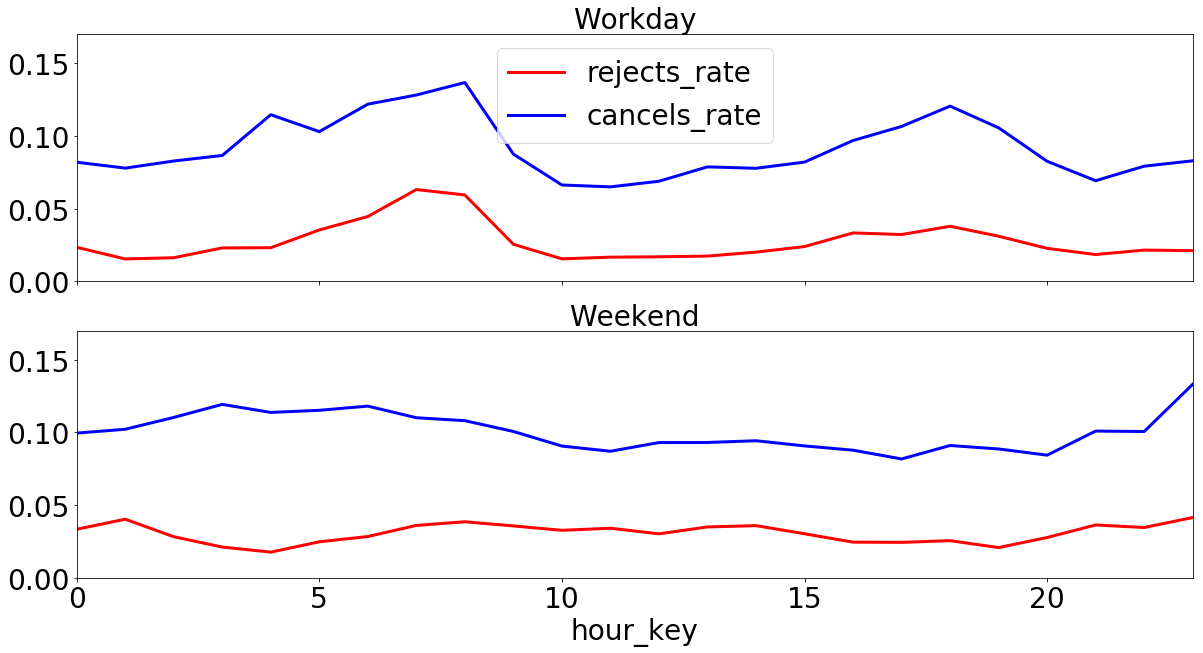

In [36]:
df_Trips_Reject = df_Trips[df_Trips['trip_status'] == 'Rejected']
df_Trips_RejectByHourDaytype = df_Trips_Reject.groupby(['hour_key', 'day_type']).size()
df_Trips_RejectByHourDaytype = df_Trips_RejectByHourDaytype.reset_index()
df_Trips_RejectByHourDaytype.rename(columns={0: 'count_rejects'}, inplace=True)

df_Trips_Cancel = df_Trips[df_Trips['trip_status'] == 'Cancelled']
df_Trips_CancelByHourDaytype = df_Trips_Cancel.groupby(['hour_key', 'day_type']).size()
df_Trips_CancelByHourDaytype = df_Trips_CancelByHourDaytype.reset_index()
df_Trips_CancelByHourDaytype.rename(columns={0: 'count_cancels'}, inplace=True)

df_Trips_ByHourDaytype = df_Trips.groupby(['hour_key', 'day_type']).size()
df_Trips_ByHourDaytype = df_Trips_ByHourDaytype.reset_index()
df_Trips_ByHourDaytype.rename(columns={0: 'count_total'}, inplace=True)

df_Trips_ByHour_Full = pd.merge(pd.merge(
    df_Trips_ByHourDaytype, df_Trips_RejectByHourDaytype, on=['hour_key', 'day_type'], how='left'),
    df_Trips_CancelByHourDaytype, on=['hour_key', 'day_type'], how='left')                            
df_Trips_ByHour_Full['rejects_rate'] = df_Trips_ByHour_Full['count_rejects'] / df_Trips_ByHour_Full['count_total']
df_Trips_ByHour_Full['cancels_rate'] = df_Trips_ByHour_Full['count_cancels'] / df_Trips_ByHour_Full['count_total']

fig, axarr = plt.subplots(2, sharex=True, figsize=(20,10))
# axarr[0].legend().set_visible(False)
# axarr[1].legend().set_visible(False)
df_Trips_ByHour_Full[df_Trips_ByHour_Full['day_type'] == 'Workday'][['rejects_rate', 'cancels_rate', 'hour_key']].set_index('hour_key').plot(
    kind='line', title='Workday', ax=axarr[0], ylim=(0, 0.17), color=['r','b'], linewidth=3)
df_Trips_ByHour_Full[df_Trips_ByHour_Full['day_type'] == 'Weekend'][['rejects_rate', 'cancels_rate', 'hour_key']].set_index('hour_key').plot(
    kind='line', title='Weekend', ax=axarr[1], ylim=(0, 0.17), color=['r','b'], linewidth=3, legend=None)

In [22]:
df_Trips_ByHour_Full[df_Trips_ByHour_Full['day_type'] == 'Workday'][['rejects_rate', 'hour_key']].set_index('hour_key')

,rejects_rate
hour_key,
0,0.023375
1,0.015365
2,0.016207
3,0.022956
4,0.023101
5,0.035314
6,0.044545
7,0.063125
8,0.059385
